## Library Imports

In [1]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau, linregress, rankdata
import matplotlib.pyplot as plt
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metaprivBIDS_stat import plot_calc
from metaprivBIDS_stat import rst_outlier_case2

## File from OpenNeuro Import
MID is the raw dataset "The Midnight Scan Club (MSC) dataset" taken from OpenNeuro. 


In [2]:
MID = 'https://s3.amazonaws.com/openneuro.org/ds000224/participants.tsv?versionId=RaGnxcCJR.z4fAw6Ihy9D683s7p4deYL'
MID = pd.read_csv(MID, sep='\t')
MID.to_csv('data_ds000224/midnight_dataset_ds003097.csv', sep=',', index=False)

na_percentage = MID.isna().mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

Series([], dtype: float64)

In [3]:
MID.head()

,participant_id,gender,age,education_degree,education_years
0,sub-MSC01,M,34,Doctorate,22.0
1,sub-MSC02,M,34,Doctorate,28.0
2,sub-MSC03,F,29,Masters,18.0
3,sub-MSC04,F,28,Bachelors,22.0
4,sub-MSC05,M,27,Bachelors,20.0


## Load in of results calculated using (MetaprivBIDS App)

The selected quasi identifers are: 
- age
- gender
- education_degree
- education_years



The dis-score fraction is the default 0.3 & missing values are indicated as NaN.

In [4]:
suda = pd.read_csv('data_ds000224/suda_ds000224.csv', sep=',')
pif = pd.read_csv('data_ds000224/pif_ds000224.csv', sep=',',index_col='Unnamed: 0').sort_index()

## Calculating Pearson and Spearman correlation on row level.

In [5]:
# Spearman Rank Correlation
correlation_spearman, p_value = spearmanr(suda['score'], pif['RIG'])
print(f"Spearman Rank Correlation between suda & pif: {correlation_spearman:.2f},{p_value:.4f}")  
    
    
# Kendall's Tau Correlation
tau, p_value = kendalltau(suda['score'], pif['RIG'])
print(f"Kendall's Tau between suda & pif: {tau:.2f}, p-value: {p_value:.4f}")

Spearman Rank Correlation between suda & pif: 0.69,0.0280
Kendall's Tau between suda & pif: 0.63, p-value: 0.0245


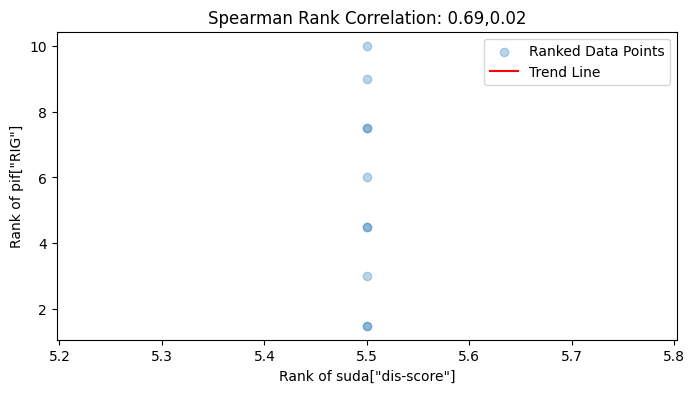

In [8]:
suda_ranked = rankdata(suda['dis-score'])
pif_ranked = rankdata(pif['RIG'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(suda_ranked, pif_ranked, alpha=0.3, label='Ranked Data Points')
slope, intercept, _, _, _ = linregress(suda_ranked, pif_ranked)
ax.plot(suda_ranked, slope * suda_ranked + intercept, color='red', label='Trend Line')
ax.set_title(f'Spearman Rank Correlation: {correlation_spearman:.2f},{p_value:.2f}')
ax.set_xlabel('Rank of suda["dis-score"]')
ax.set_ylabel('Rank of pif["RIG"]')
ax.grid(False)
ax.legend()
plt.show()

# Outlier detection for SUDA & PIF

In [12]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')
print(len(above_outlier_indices))
class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

0
1


### Chosen participant outlier

In [13]:
MID.loc[1]

participant_id      sub-MSC02
gender                      M
age                        34
education_degree    Doctorate
education_years          28.0
Name: 1, dtype: object